<a href="https://colab.research.google.com/github/LuOrdonez/Portfolio/blob/main/regiones_de_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit


#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 28})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20

# **Ejercicio 6**

Se quiere estudiar la relación entre el brillo máximo de un cierto tipo de estrellas variables y el período de sus variaciones de brillo. Para ello se mide, para cada estrella ($F_i$), la cantidad de fotones que llegan al detector durante un tiempo $t_i$, en el momento que alcanza su máximo brillo. Se mide además la cantidad de fotones $F_c$ que llegan de una región del cielo libre de estrellas durante un tiempo $t_c$. Los brillos se determinan mediante

$B_i = \frac{F_i}{t_i} - \frac{F_c}{t_c}$

El período $P_i$ de la variación del brillo de cada estrella se mide determinando el tiempo entre dos instantes de máximo brillo sucesivos. Esta medición es mucho más precisa, por lo que se considera de error despreciable. El valor obtenido para el cielo es $F_c = 1021$ fotones, medidos durante un $t_c = 100s$. Considere insignificante el error en $t_c$ y $t_i$.

Un modelo teórico predice que el brillo máximo de la estrella $B$ y su período $P$ están relacionados mediante la ecuación $B = \beta + \alpha \log_{10}{P}$. Determine la mejor estimación del valor de los parámetros $\alpha$ y $\beta$ del modelo con su matriz de error.

Dibuje a mano alzada las regiones de confianza frecuentistas con una probabilidad conjunta del 39.3%, 86.5% y 98.9% CL. ¿Por qué hemos elegido en particular estos números?

In [ ]:
P = np.array([18.17, 2.79, 13.61, 12.08, 1.89])

t = np.array([200,100,150,150,100])

F = np.array([4854, 2586, 3752, 3753, 2605])

F_c = 1021

t_c = 100

B = F/t - F_c/t_c

error_B = np.sqrt(F/t**2 + F_c/t_c**2)


Estimo los valores de $\alpha$ y $\beta$ con un ajuste a los datos

In [ ]:
def modelo(x, a, b):
    return a*np.log10(x)+b

popt, pcov = curve_fit(modelo, P, B, sigma = error_B, absolute_sigma = True)

sigma_alfa = np.sqrt(pcov[0,0])
sigma_beta = np.sqrt(pcov[1,1])
cov_alfa_beta = pcov[0,1]

print(f'alfa = {popt[0]:.2f} +- {sigma_alfa:.2f}')
print(f'beta = {popt[1]:.2f} +- {sigma_beta:.2f}')
print(f'covarianza = {cov_alfa_beta:.2f}')


alfa = -1.59 +- 0.63
beta = 16.36 +- 0.62
covarianza = -0.36


Dibujo las regiones de confianza

Estoy asumiendo que $\alpha$ y $\beta$ siguen una distribución gaussiana. La probabilidad conjunta es una normal bivariada.

Los niveles de confianza que me piden se asocian a 1,2 y 3 $\sigma $

In [ ]:
#defino la ecuación de la elipse
def elipse(x1,x2,mu1,mu2,sigma1,sigma2,c):
    return (1/(1-c**2))*((x1-mu1)**2/sigma1**2 + (x2-mu2)**2/sigma2**2 - 2*corr*(x1-mu1)*(x2-mu2)/(sigma1*sigma2))

#defino los puntos de intersección
def interseccion(x1,x2,sigma1,sigma2,c):
    x = x1-sigma1, x1-c*sigma1, x1+c*sigma1, x1+sigma1
    y = x2-sigma2, x2-c*sigma2, x2+c*sigma2, x2+sigma2
    return x,y



In [ ]:
corr = cov_alfa_beta/(sigma_alfa*sigma_beta)
tolerancia = 0.05

alfa_elipse = []
beta_elipse = []

for i in range(1,4):
    puntos_alfa, puntos_beta = interseccion(popt[0], popt[1], i*sigma_alfa, i*sigma_beta, corr)
    alfa_suave = np.linspace(popt[0]-i*sigma_alfa, popt[0]+i*sigma_alfa, 2000)
    beta_suave = np.linspace(popt[1]-i*sigma_beta, popt[1]+i*sigma_beta, 2000)
    x1 = []
    x2 = []

    for n in alfa_suave:
        for j in beta_suave:
            if (elipse(n,j,popt[0],popt[1], sigma_alfa, sigma_beta, corr) >= i**2 - tolerancia) and (elipse(n,j,popt[0],popt[1], sigma_alfa, sigma_beta, corr) <= i**2 + tolerancia)  :
                x1.append(n)
                x2.append(j)
    alfa_elipse.append(x1)
    beta_elipse.append(x2)


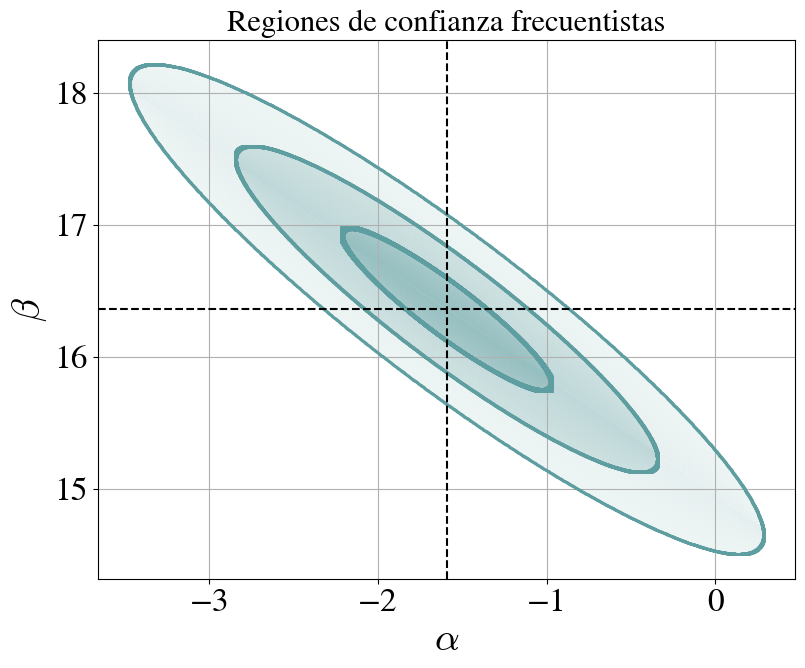

In [ ]:
plt.plot(alfa_elipse[0], beta_elipse[0], color = 'cadetblue', marker = '.', linestyle='', markersize = 1)
plt.plot(alfa_elipse[1], beta_elipse[1], color = 'cadetblue', marker = '.', linestyle='', markersize = 1)
plt.plot(alfa_elipse[2], beta_elipse[2], color = 'cadetblue', marker = '.', linestyle='', markersize = 1)

plt.fill(alfa_elipse[0], beta_elipse[0], color = 'cadetblue', alpha = 0.3)
plt.fill(alfa_elipse[1], beta_elipse[1], color = 'cadetblue', alpha = 0.2)
plt.fill(alfa_elipse[2], beta_elipse[2], color = 'cadetblue', alpha = 0.1)

plt.axvline(x = popt[0], color = 'black', linestyle = '--')
plt.axhline(y = popt[1], color = 'black', linestyle = '--')

plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')
plt.title('Regiones de confianza frecuentistas')
plt.show()